<a href="https://colab.research.google.com/github/Daksh-Dhaker/Neural-Networks/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
X = df.drop('benign_0__mal_1',axis =1).values
y = df['benign_0__mal_1'].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state =101)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
X_train = scaler.fit_transform(X_train)

In [10]:
X_test = scaler.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [13]:
X_train.shape

(426, 30)

In [14]:
model = Sequential()

In [16]:
model.add(Dense(30,activation ='relu'))
model.add(Dense(15,activation ='relu'))


# Binary Classification -> Sigmoid
model.add(Dense(1,activation ='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [17]:
model.fit(x = X_train, y = y_train,epochs = 600,validation_data =(X_test,y_test) )

Epoch 1/600
14/14 [==============================] - 2s 34ms/step - loss: 0.6741 - val_loss: 0.6575
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6374 - val_loss: 0.6221
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5952 - val_loss: 0.5735
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5400 - val_loss: 0.5050
Epoch 5/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4692 - val_loss: 0.4234
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3910 - val_loss: 0.3286
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3075 - val_loss: 0.2693
Epoch 8/600
14/14 [==============================] - 0s 11ms/step - loss: 0.2597 - val_loss: 0.2029
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.2168 - val_loss: 0.1704
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1856 - val_loss: 0.1525
Epoch 

In [21]:
loss = pd.DataFrame(model.history.history)

<Axes: >

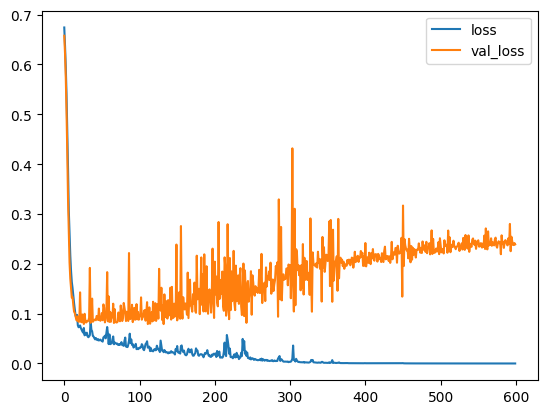

In [26]:
loss.plot()# This curve clearly shows the condition of overfitting in order to stop that we will use early-stopping.

In [30]:
# Method-1 : To prevent overfitting (Early Stoping)-------------------------------------
model1 = Sequential()
model1.add(Dense(30,activation ='relu'))
model1.add(Dense(15,activation ='relu'))

model1.add(Dense(1,activation = 'sigmoid'))
model1.compile(loss = 'binary_crossentropy',optimizer ='adam')

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor ='val_loss',mode = 'min',verbose =1,patience =25) # Here we have to minimize the loss if the metirc would have been accuracy then it would be 'max'

In [34]:
model1.fit(x = X_train, y = y_train,epochs = 600,validation_data =(X_test,y_test),callbacks =[early_stop] )

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6674 - val_loss: 0.6467
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6250 - val_loss: 0.6037
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5793 - val_loss: 0.5552
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5313 - val_loss: 0.5094
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4873 - val_loss: 0.4606
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4408 - val_loss: 0.4115
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3940 - val_loss: 0.3649
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3530 - val_loss: 0.3251
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3175 - val_loss: 0.2897
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2871 - val_loss: 0.2619
Epoch 11

In [38]:
loss =pd.DataFrame(model1.history.history)

<Axes: >

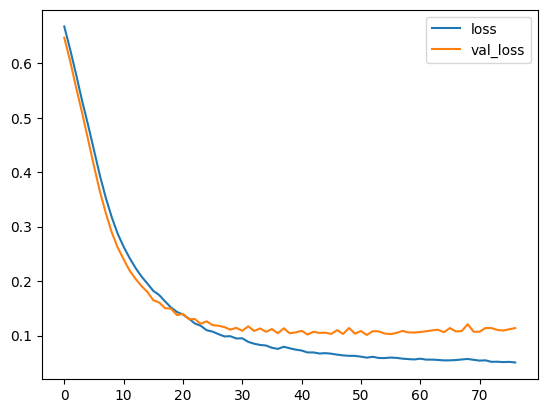

In [39]:
loss.plot()

In [40]:
# Method-2 : To prevent overfitting (using Drop-out Layers) It will turn-off a percentage of neurons randomly
model2 = Sequential()
model2.add(Dense(30,activation ='relu'))
model2.add(Dropout(0.5))# It means 50 percent neurons will be turned off randomly
model2.add(Dense(15,activation ='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1,activation = 'sigmoid'))
model2.compile(loss = 'binary_crossentropy',optimizer ='adam')

In [41]:
model2.fit(x = X_train, y = y_train,epochs = 600,validation_data =(X_test,y_test),callbacks =[early_stop] )

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6955 - val_loss: 0.6788
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6725 - val_loss: 0.6666
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6709 - val_loss: 0.6532
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6659 - val_loss: 0.6388
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6571 - val_loss: 0.6241
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6291 - val_loss: 0.6077
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6066 - val_loss: 0.5876
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5945 - val_loss: 0.5621
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5618 - val_loss: 0.5350
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5664 - val_loss: 0.5080
Epoch 11

In [42]:
loss = pd.DataFrame(model2.history.history)

<Axes: >

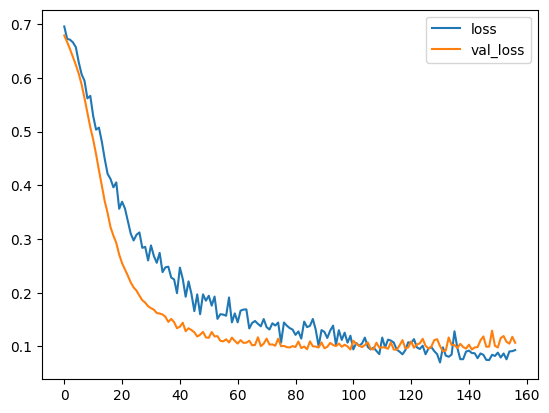

In [43]:
loss.plot()

In [58]:
predictions = model2.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [59]:
binary_classification = (predictions > 0.5).astype('int32')

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(y_test,binary_classification))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [62]:
print(confusion_matrix(y_test,binary_classification))

[[54  1]
 [ 2 86]]
